C:\Users\tiany\Anaconda3\lib\site-packages\ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in longlong_scalars


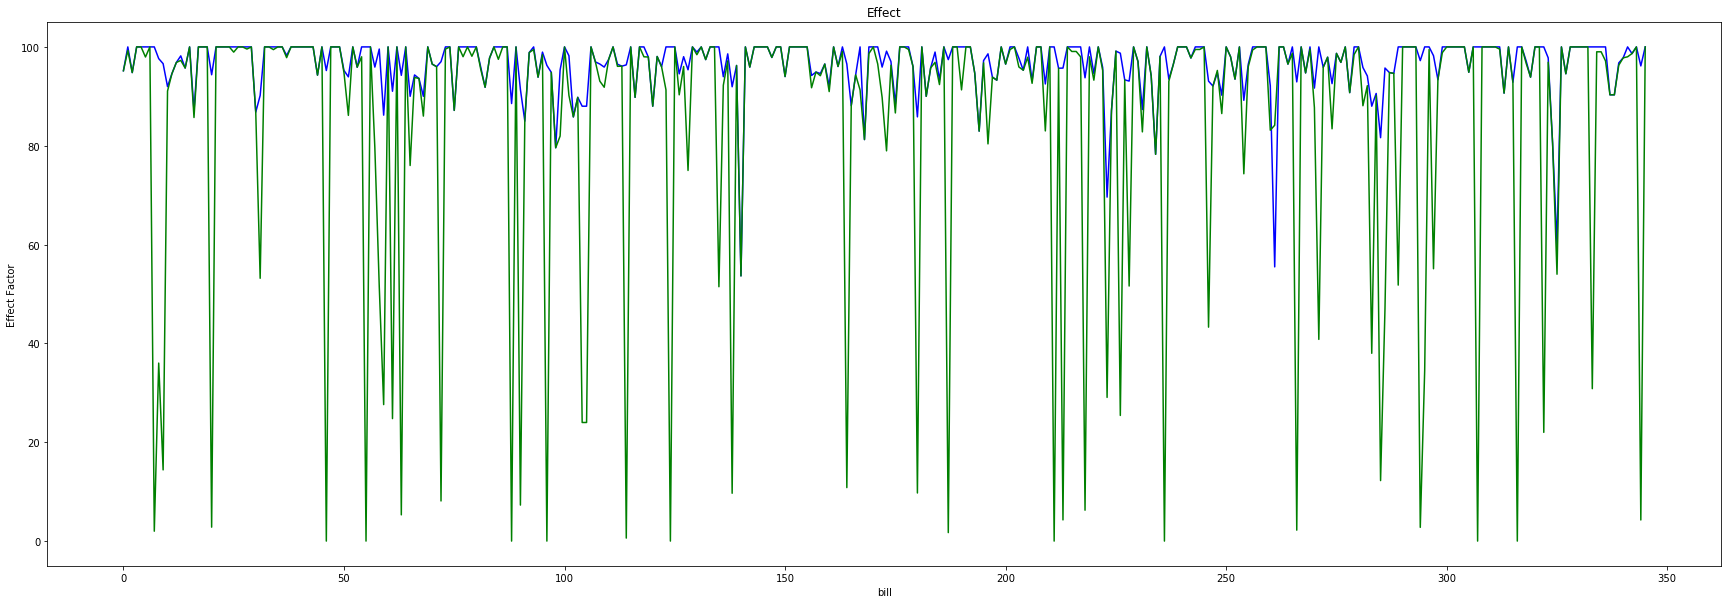

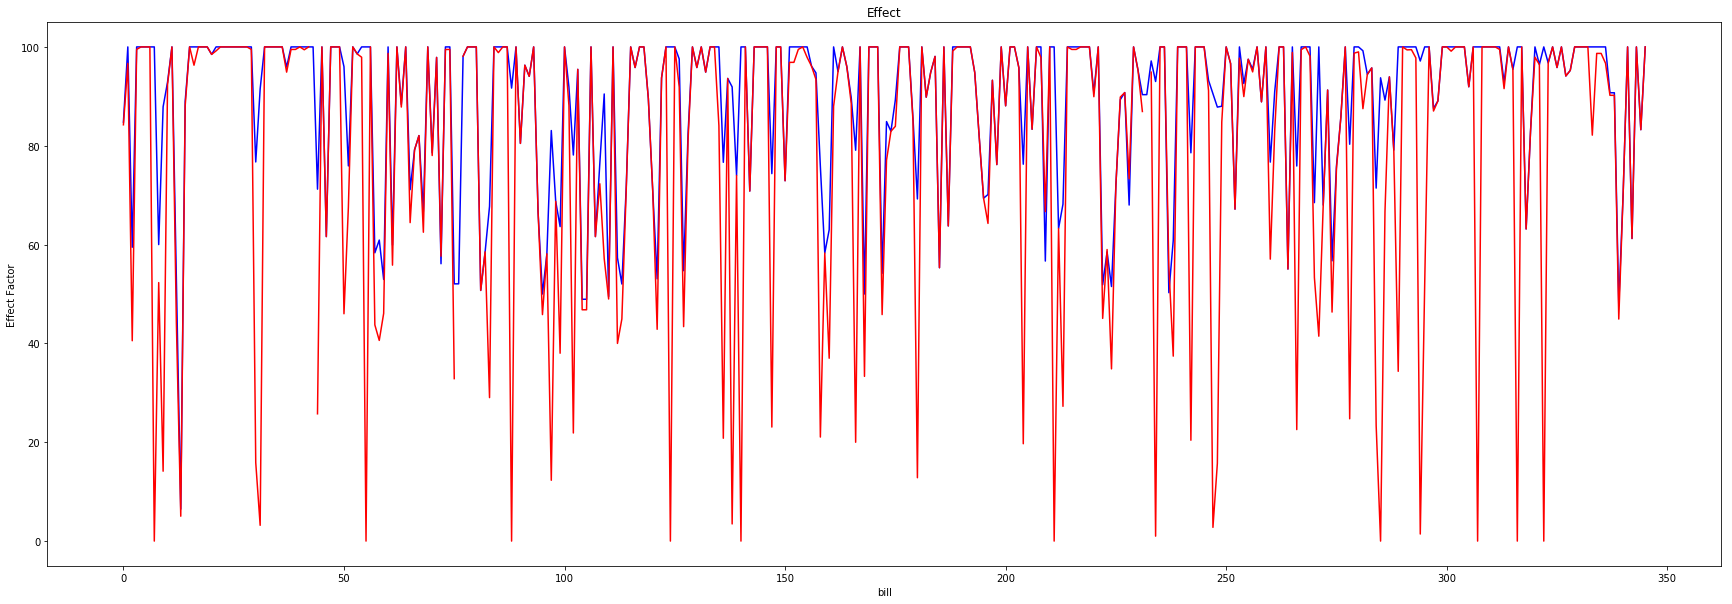

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import csv
import numpy as np

path = r'C:\Users\tiany\Documents\EE6895 big data\bill\110'
allFiles = glob.glob(path + "/*.csv")
#allFiles = glob.glob("bill/*.csv")
inf_list_D = []
inf_list_R = []
billname = []

dlist = []
rlist = []

for i in range(len(allFiles)):
    #read csv files
    df = pd.read_csv(allFiles[i], encoding='latin-1',low_memory=False)
    billname.append(i)
    df['Contribution Amount'] = df['Contribution Amount'].str.replace('$','')
    df['Contribution Amount'] = df['Contribution Amount'].astype(float)
    name = df.columns.values.tolist()
    v = name[3]
    n = name[-4]
    df = df.rename(columns={n: 'Interest Group Position',v:'Vote'})
    clean = df.drop(['Represents','Contribution Type','Presidential','Contribution Date','Contributor','Contributor Occupation','Contributor Interest Group Code','Contributor City','Contributor State','Contributor Zip','Contributor Employer','Contributor Interest Group'],axis=1)
    g = clean.groupby(['Party','Interest Group Position']).sum()
    newclean =  df.drop(['Represents','Contribution Type','Presidential','Contribution Amount','Contribution Date','Contributor','Contributor Occupation','Contributor Interest Group Code','Contributor City','Contributor State','Contributor Zip','Contributor Employer','Contributor Interest Group'],axis=1)
    dd = newclean.drop_duplicates(subset=['Legislator', 'Party', 'Vote'])
    a = (dd['Party'][dd['Vote']=='No']=='Democrat').sum()
    b = (dd['Party'][dd['Vote']=='Not Voting']=='Democrat').sum()
    c = (dd['Party'][dd['Vote']=='Yes']=='Democrat').sum()
    d = (dd['Party'][dd['Vote']=='No']=='Independent').sum()
    e = (dd['Party'][dd['Vote']=='Not Voting']=='Independent').sum()
    f = (dd['Party'][dd['Vote']=='Yes']=='Independent').sum()
    j = (dd['Party'][dd['Vote']=='No']=='Republican').sum()
    k = (dd['Party'][dd['Vote']=='Not Voting']=='Republican').sum()
    l = (dd['Party'][dd['Vote']=='Yes']=='Republican').sum()

    #dataframe
    pd.set_option('display.precision',15)
    pd.DataFrame({'x':[.000000000000001]})

    arrays = [['Democrat', 'Democrat','Democrat', 'Republican','Republican', 'Republican'],
                      ['Oppose','', 'Support', 'Oppose','', 'Support']]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples, names=['Party', 'Interest Group Position'])
    column = ['Contribution Amount', 'Vote', 'Count']
    s = pd.DataFrame(index=index, columns=column)
    votes = ['No','Not Voting','Yes','No','Not Voting','Yes']
    count = [a,b,c,j,k,l]
    s['Vote'] = votes
    s['Count'] = count
    newframe = s.fillna(g)
    effect = newframe.fillna(0)
    #inf_list = []
    if a > c:
        result = a/(a+b+c)*100
    if a < c:
        result = c/(a+b+c)*100
    #print (result)
    inf_list_D.append(result)
    #R inf
    #inf_list = []
    if j > l:
        result_r = j/(j+k+l)*100
    if j < l:
        result_r = l/(j+k+l)*100
    inf_list_R.append(result_r)
    
    gg = clean.groupby(['Legislator','Party','Vote','Interest Group Position']).sum()
    leglist = newclean.drop_duplicates(subset=['Legislator'])
    leglist = leglist['Legislator'].tolist()
    num = len(leglist)
    reset = gg.reset_index()
    dind=0
    rind=0
    for v in range(num):
        na = leglist[v]
        name = reset[reset['Legislator']==na]
        if name['Party'].any() == 'Democrat':
            dmoneyo = name['Contribution Amount'][name['Interest Group Position']=='Oppose'].tolist()
            if dmoneyo ==[]:
                dmoneyo = 0.0
            else:
                dmoneyo = dmoneyo[0]
        #print(dmoneyo)
            dmoneys = name['Contribution Amount'][name['Interest Group Position']=='Support'].tolist()
            if dmoneys ==[]:
                dmoneys = 0.0
            else:
                dmoneys = dmoneys[0]
            #if a > c:
            if name.iloc[0]['Vote'] =='No':
                if dmoneyo > dmoneys:
                    dind+=1
            #if a < c:
            if name.iloc[0]['Vote'] =='Yes':
                if dmoneyo < dmoneys:
                    dind+=1
        if name['Party'].any() == 'Republican':
            rmoneyo = name['Contribution Amount'][name['Interest Group Position']=='Oppose'].tolist()
        #dmoneyo = dmoneyo[0]
            if rmoneyo ==[]:
                rmoneyo = 0.0
            else:
                rmoneyo = rmoneyo[0]
        #print(dmoneyo)
            rmoneys = name['Contribution Amount'][name['Interest Group Position']=='Support'].tolist()
            if rmoneys ==[]:
                rmoneys = 0.0
            else:
                rmoneys = rmoneys[0]
            #if j > l:
            if name.iloc[0]['Vote'] =='No':
                if rmoneyo > rmoneys:
                    rind+=1
            #if j < l:
            if name.iloc[0]['Vote'] =='Yes':
                if rmoneyo < rmoneys:
                    rind+=1
        di = dind/(a+b+c)*100
        ri = rind/(j+k+l)*100
    dlist.append(di)
    rlist.append(ri)
#plot

plt.figure(figsize=(30,10))
plt.plot(billname,inf_list_D,'b')
plt.plot(billname,dlist,'g')
plt.title('Effect')
plt.xlabel('bill')
plt.ylabel('Effect Factor')
plt.show()



#plt.subplot(2,1,2)
plt.figure(figsize=(30,10))
plt.plot(billname,inf_list_R,'b')
plt.plot(billname,rlist,'r')
plt.title('Effect')
plt.xlabel('bill')
plt.ylabel('Effect Factor')
plt.show()

In [41]:
mean_party = np.mean(inf_list_D)
mean_money = np.mean(dlist)
print(mean_party,mean_money)

96.5780057686 85.6801311077


In [133]:
mean_party = np.mean(inf_list_R)
mean_money = np.nanmean(rlist)
print(mean_party,mean_money)

89.1979556117 79.1832399877


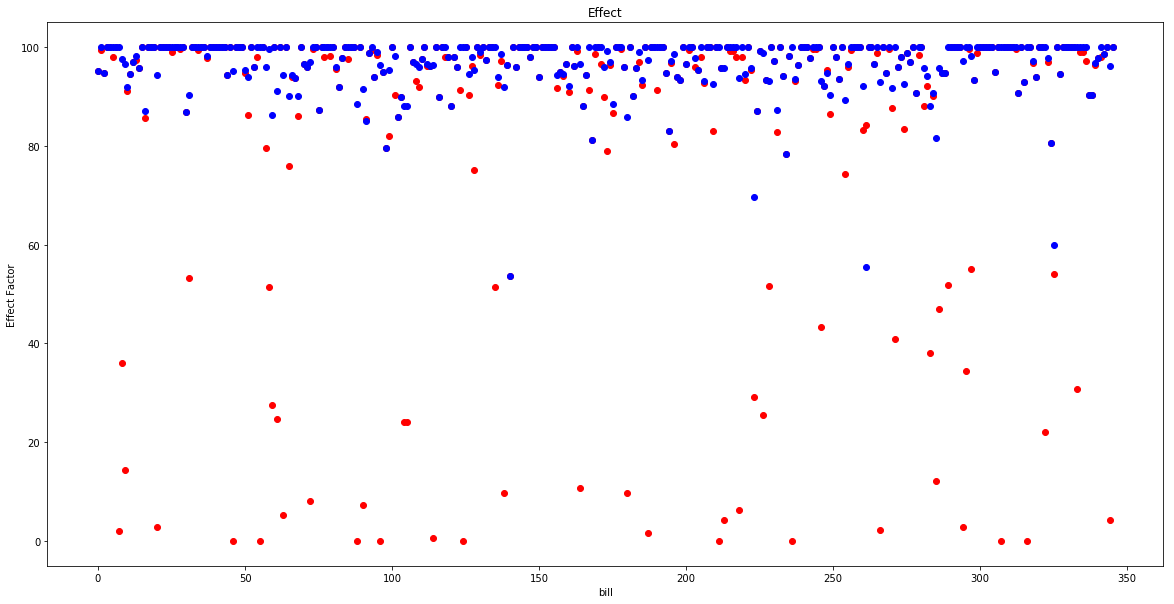

In [119]:
fig = plt.figure(figsize=(20,10))
plt.plot(billname,dlist,'ro')
plt.plot(billname,inf_list_D,'bo')
#plt.plot(billname,dlist,'ro')
plt.title('Effect')
plt.xlabel('bill')
plt.ylabel('Effect Factor')
plt.show()
fig.savefig('p1_1.png')

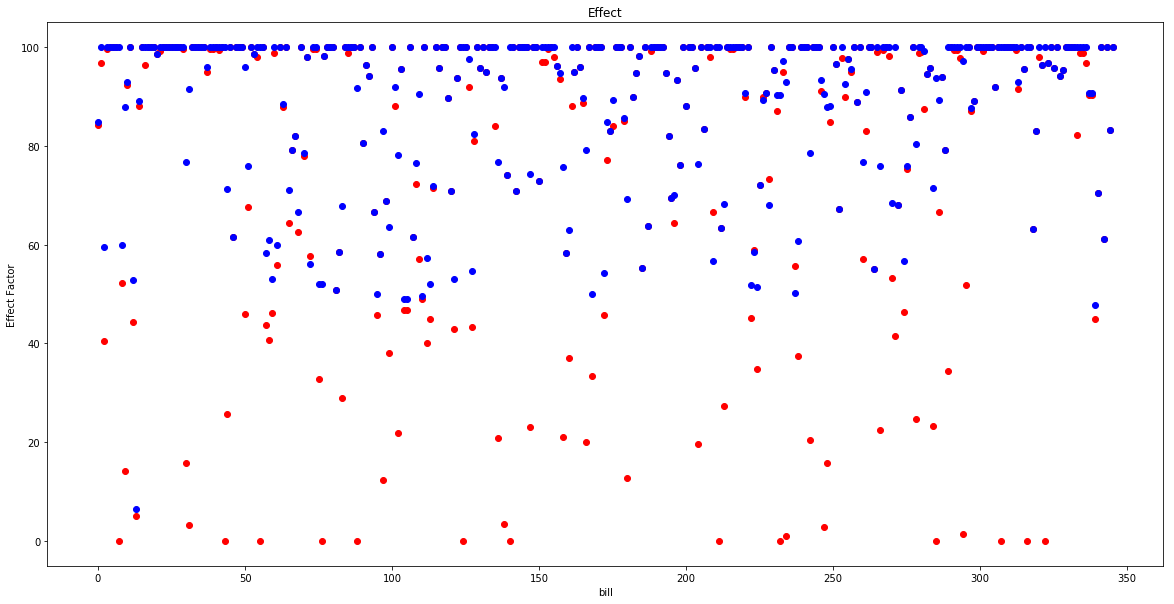

In [120]:
fig = plt.figure(figsize=(20,10))
plt.plot(billname,rlist,'ro')
plt.plot(billname,inf_list_R,'bo')
plt.title('Effect')
plt.xlabel('bill')
plt.ylabel('Effect Factor')
plt.show()
fig.savefig('p2_2.png')

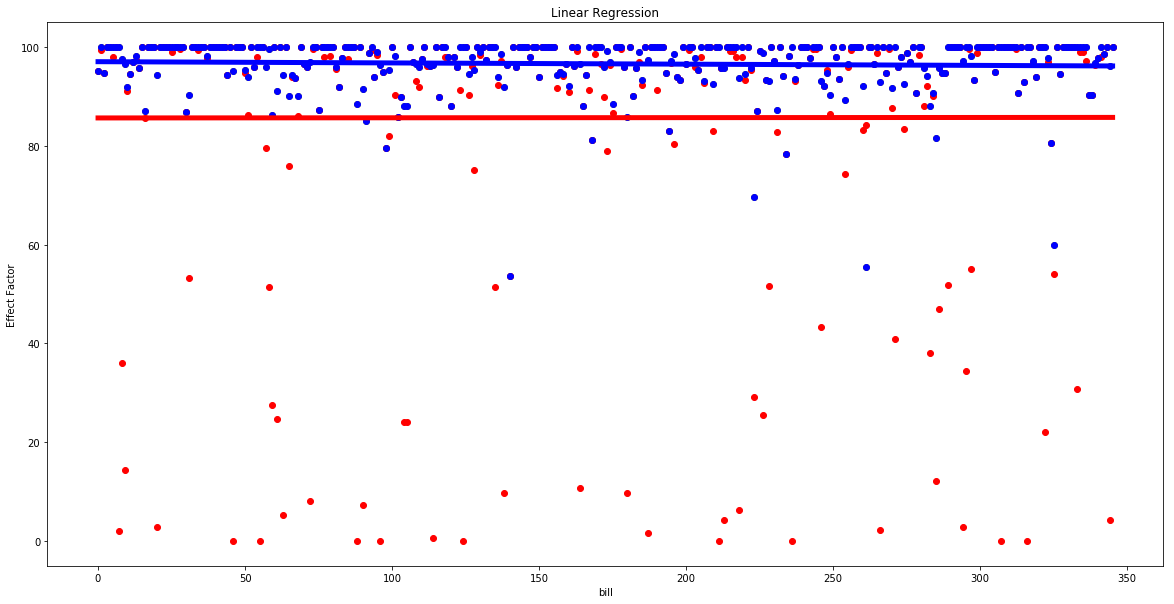

In [131]:
fig = plt.figure(figsize=(20,10))
x=billname
y=inf_list_D
z = dlist
fit = np.polyfit(x,y,1)
fit1 = np.polyfit(x,z,1)
fit_fn = np.poly1d(fit) 
fit1_fn= np.poly1d(fit1) 
plt.xlabel('bill')
plt.ylabel('Effect Factor')
plt.title('Linear Regression')
plt.plot(x,y, 'yo',x,z, 'ro',x,y, 'bo')
plt.plot(x, fit1_fn(x), 'r',x, fit_fn(x), 'b',linewidth=5.0)
plt.show()
fig.savefig('p3.png')

In [69]:
rlist = np.nan_to_num(rlist)

In [71]:
np.mean(rlist)


79.183239987736599

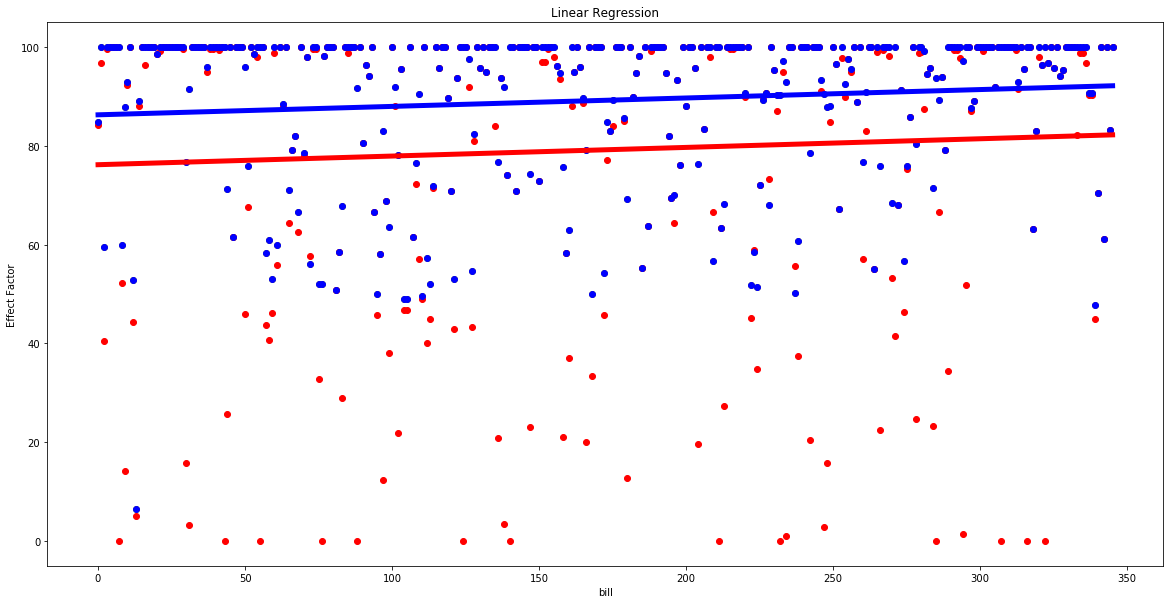

In [132]:
fig = plt.figure(figsize=(20,10))
x=billname
y=inf_list_R
z = rlist
fit = np.polyfit(x,y,1)
fit1 = np.polyfit(x,z,1)
fit_fn = np.poly1d(fit) 
fit1_fn= np.poly1d(fit1) 
plt.xlabel('bill')
plt.ylabel('Effect Factor')
plt.title('Linear Regression')
plt.plot(x,y, 'yo',x,z, 'ro',x,y, 'bo')
plt.plot(x, fit_fn(x), 'b', x, fit1_fn(x), 'r',linewidth=5.0)
plt.show()
fig.savefig('p4.png')